# AIRPLANE PROJECT - LAPPY

## 1. Lappy presentation / plane's pre-design

Lappy is a pre-design tool used to determine the main characteristics of a business jet meeting given specifications. These characteristics are determined through the sudy of the following points:

- cabin design, making it possible to accomodate passengers, luggage and crew in good comfort conditions,
- first estimate of aircraft weight to evaluate the necessary wing area,
- choice of an engine with the necessary thrust for take off,
- estimate of fuel volume to succeed in the mission,
- positioning of airfoils, with respect to center of gravity to ensure stability and manoeuvrability during flight. 

## 2. Initialization

### a. Libraries, global variables and useful functions



In [1]:
%run LAPPY_Valeurs_et_fonctions_utiles.ipynb

In [2]:
class Avion:
    "Definition of a business jet"
class Trace:
    "Definition of an object of type Trace"
    

### b. Initialization, specifications and initial values

        *** Values to be modified depending on your specifications ***

In [3]:
def initialisation(avion):
    #Specifications
    avion.mach_obj = 0.8        #Cruise Mach
    avion.zm_obj = 41000*0.3048 #Cruise altitude [m]
    avion.npax_obj = 12         #Number of passenger(s)
    avion.bfl_obj = 1500        #Desired runway takeoff length [m]
    avion.dist_obj = 6500000    #Desired range [m]
    avion.nmo = 14              #Engine number
    
    #Values to be initialized
    avion.qi = 10000  #Fuel quantity
    avion.sremp = 8   #Elevators' reference area [m2]
    avion.srd = 8     #Rudder's reference area [m2]
    avion.srv = 50    #Wings reference area [m2]
    avion.xrv = 6     #X wings position [m]
    return
    
    

### c. Loading of the different modellers' scripts

The program is split into different modellers used to **assign input values, calculate, analyze and correct** plane's characteristics associated with:
- cabin design, 
- geometry, 
- propulsion, 
- aerodynamics,
- performances. 

In [4]:
%run LAPPY_Modeleur_amenagement.ipynb
%run LAPPY_Modeleur_geometrie.ipynb
%run LAPPY_Modeleur_propulsion.ipynb
%run LAPPY_Modeleur_aerodynamique.ipynb
%run LAPPY_Modeleur_masse.ipynb
%run LAPPY_Modeleur_performances.ipynb

## 3. Calculation of a full definition

### a. Initialization

Creation of  "plane" Instance, initialized with specifications data and first variables assignments. 

| Variable    | Libellé / Definition                                        | Unité / Unit|
| ----------- | ----------------------------------------------------------- | ----------- |
|  qi         | Quantité carburant / Fuel quantity                          | kg          |
| srd         | Surface de référence dérive / Rudder's reference area       | m2          |
| sremp       | Surface de référence empennage / Elevators' reference area  | m2          |
| srv         | Surface référence voilure / Wings' reference area           | m2          |


Creation of a "trace" object to study the evolution of some characteristics. 

In [5]:
avion=Avion()   # creation of an instance "avion" of class "Avion"
initialisation(avion)  # initialization with specifications and chosen initial values

trace=Trace()   # creation of an instance "trace" of class "Trace"
liste_att_trace=("qi","srd","sremp","srv","xrv")  # list of variables to be plotted

init_trace(trace)


### b. Cabin design
"Cabin design" relies on some recommended values to define a few plane's attributes, among them is cabin length. .

In [6]:
# Aménagement
affecte_entrees_amenagement(avion)
calcul_amenagement(avion)

print("Some plane's characteristics after cabin design")
HTML(code_tableau_html_H_att([avion], ("npax_obj", "nbsalon", "lcab")))

Some plane's characteristics after cabin design


npax_obj,nbsalon,lcab
12,3,8.1


### c. Geometry
Based on recommended values, "geometry" study leads to design plane's wings and tail. 

In [7]:
# Géométrie
affecte_entrees_geometrie(avion)
calcul_geometrie(avion)

### d. Propulsion
"Propulsion" completes plane's definition by engine's choice, enabling a first graphical sketch.

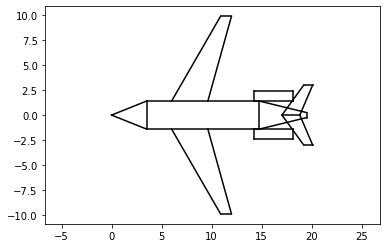

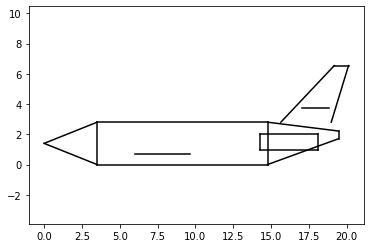

In [8]:
affecte_entrees_propulsion(avion)
calcul_propulsion(avion)
vue_dessus(avion)
vue_profil(avion)

### e. Aerodynamics
Calculates aerodynamics characteristics.


In [9]:
avion.mis_cz=0.34 # hypothèse car sera calculé grace au modeleur masse
affecte_entrees_aerodynamique(avion)
calcul_aerodynamique(avion)
analyse_finesse(avion)
calcul_foyer_aero(avion)

### f. Weight
Calculates weight and center of gravity position. 

In [ ]:
affecte_entrees_masse(avion)
calcul_masses(avion)

### g. Performance
Evaluates plane's performances (runway length for takeoff and range).


In [ ]:
affecte_entrees_performances(avion)
print(analyse_performances_gv(avion))
print(analyse_performances_bv(avion))

## 4. First definition correction

It is up to you to define analysis and correction functions to achieve a first correction step. Do not forget to call, in your correction functions **inc_trace(avion,trace)**, so that attributes values evolution be stored.

In [ ]:
def analyse(avion):
    print("Full analysis :")
    print("- Runway length analysis ", round(analyse_performances_bv(avion),deci), "Ok si = 1")
    print("- Flight range analysis ", round(analyse_performances_gv(avion),deci), "Ok si = 1")
    print("- Elevator dimension analysis ", round(analyse_cvemp(avion),deci), "Ok si = 1")
    print("- Rudder dimension analysis ", round(analyse_cvd(avion),deci), "Ok si = 1")
    print("- Static margin analysis ", round(calcul_masses(avion),deci), "Ok si = 0.1")

In [ ]:
def correction_xrv(avion, trace):
    avion.xrv = avion.xrv-(calcul_masses(avion)-0.1) 
    inc_trace(avion, trace)

def correction_qi(avion, trace):
    avion.qi = avion.qi / exp(analyse_performances_gv(avion)-1)
    inc_trace(avion, trace)

def correction_srv(avion, trace):
    avion.srv = avion.srv * analyse_performances_bv(avion)
    inc_trace(avion, trace)

def correction_srd(avion, trace):
    avion.srd = avion.srd / analyse_cvd(avion)
    inc_trace(avion, trace)

def correction_sremp(avion, trace):
    avion.sremp = avion.sremp / analyse_cvemp(avion)
    inc_trace(avion, trace)

In [ ]:
analyse(avion)

#### Plane's characteristics after the first corrections and parameters evolution

Here can be displayed plane's main definition parameters current definition and their evolution after corrections. 

In [ ]:
HTML(code_tableau_html_H_att([avion], ("srv", "srd", "sremp", "xrv","qi","mtow")))
courbe_iteration (trace, trace.srv, "Surf. ref voilure", "r")
courbe_iteration (trace, trace.qi, "quantité carburant", "b")
courbe_iteration (trace, trace.xrv, "position voilure", "g")
courbe_iteration (trace, trace.srd, "surface dérive", "y")
courbe_iteration (trace, trace.sremp, "surface empenage", "k")

## 5. Design process definition

You have to define a process in the  form of a diagram. You can use an online application to create the diagram. For example https://mermaidjs.github.io/mermaid-live-editor/ that starts from the following code:



```
graph TD
A[Etape 1] --> G[Etape 2]
G -->B{analyse_performances_bv}

B -->|=1| C{analyse_cvd}
B -->|!=1| correction_srv
correction_srv --> A

C -->|=1| D{analyse_cvemp}
C -->|!=1| correction_srd
correction_srd --> A

D -->|=1| E{analyse_performances_gv}
D -->|!=1| correction_sremp
correction_sremp --> A

E -->|=1| F{calcul_masses}
E -->|!=1| correction_qi
correction_xrv --> A

F -->|=1| H[Final step]
F -->|!=1| correction_xrv
correction_qi --> A
```

to make the following graph::

![organigramme](Images/organigramme.JPG)

Then you have to code the process, defining functions for each step according to the following pattern:

In [ ]:
def etape1(avion, trace):
    #Calculs 
    calcul_amenagement(avion)
    calcul_geometrie(avion)
    calcul_propulsion(avion)
    calcul_aerodynamique(avion)
    analyse_finesse(avion)
    calcul_foyer_aero(avion)
    calcul_masses(avion)
    #Etape Suivante
    avion.count += 1
    if avion.count == 500:
        etape3(avion,trace)
    else:
        etape2(avion, trace)

    
def etape2(avion, trace):
    if (round(analyse_performances_bv(avion),deci) != 1) :
        correction_srv(avion, trace)
        etape1(avion, trace)
    elif (round(analyse_cvd(avion),deci) != 1) :
        correction_srd(avion, trace)
        etape1(avion, trace)
    elif (round(analyse_cvemp(avion),deci) != 1) :
        correction_sremp(avion, trace)
        etape1(avion, trace)
    elif (round(analyse_performances_gv(avion),deci) != 1) :
        correction_qi(avion, trace)
        etape1(avion, trace)
    elif (round(calcul_masses(avion),deci) != 0.1) :
        correction_xrv(avion, trace)
        etape1(avion, trace)
    else :
        etape3(avion, trace)

def etape3(avion, trace):
    # final step
    print("End of Design.")
    analyse(avion)
    vue_dessus(avion)
    vue_profil(avion)

# 6. Running design process

Now it is up to you to run the run process and display the results.
There is little chance that it works at first: dimensioning process is iterative and must converge.

In [ ]:
init_trace(trace)
avion.count=0
etape1(avion, trace)
HTML(code_tableau_html_H_att([avion], ("srv", "srd", "sremp", "xrv","qi","mtow")))

In [ ]:
courbe_iteration (trace, trace.srv, "Surf. ref voilure", "r")
courbe_iteration (trace, trace.qi, "quantité carburant", "b")
courbe_iteration (trace, trace.xrv, "position voilure", "g")
courbe_iteration (trace, trace.srd, "surface dérive", "y")
courbe_iteration (trace, trace.sremp, "surface empenage", "k")

In [ ]:
# pickle.dump(avion, open('avion7.bin', 'wb'))

In [ ]:
# %run LAPPY_Export_xls.ipynb
# export_avion_xls(avion)